# data preprocessing

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [49]:
dt=pd.read_csv('hypothyroid.csv')

In [50]:
dt

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,?,SVI,P


In [51]:
pd.options.display.max_columns=50

In [52]:
dt.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,P


In [53]:
dt.sample(10)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
818,37,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,22,t,1.4,t,71,t,0.97,t,73,f,?,other,N
886,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,3.2,t,1.2,t,122,t,0.94,t,131,f,?,SVI,P
2190,37,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,12,t,2.4,t,84,t,1.24,t,68,f,?,STMW,N
863,61,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,6.2,t,1.2,t,83,t,0.82,t,101,f,?,SVI,N
3403,16,?,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,3.1,t,1.1,t,96,t,0.87,t,111,f,?,SVI,P
2040,58,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.05,t,2.6,t,132,t,1.03,t,128,f,?,SVI,P
2762,51,M,f,t,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,77,t,0.77,t,99,f,?,other,P
3251,66,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,3.8,t,1.9,t,119,t,1,t,119,f,?,other,P
1321,38,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.5,t,1.5,t,81,t,0.86,t,94,f,?,SVI,P
853,73,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.42,t,3,t,91,t,1.15,t,79,f,?,other,P


In [54]:
dt['age'].unique()

array([ 41,  23,  46,  70,  18,  59,  80,  66,  68,  84,  67,  71,  28,
        65,  42,  63,  51,  81,  54,  55,  60,  25,  73,  34,  78,  37,
        85,  26,  58,  64,  44,  48,  61,  35,  83,  21,  87,  53,  77,
        27,  69,  74,  38,  76,  45,  36,  22,  43,  72,  82,  31,  39,
        49,  62,  57,   1,  50,  30,  29,  75,  19,   7,  79,  17,  24,
        15,  32,  47,  16,  52,  33,  13,  10,  89,  56,  20,  90,  40,
        88,  14,  86,  94,  12,   4,  11,   8,   5, 455,   2,  91,   6,
        93,  92], dtype=int64)

In [55]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   int64 
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [56]:
pd.options.display.max_rows = 999

In [57]:
dt

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,?,SVI,P


In [58]:
dt['age'].unique()

array([ 41,  23,  46,  70,  18,  59,  80,  66,  68,  84,  67,  71,  28,
        65,  42,  63,  51,  81,  54,  55,  60,  25,  73,  34,  78,  37,
        85,  26,  58,  64,  44,  48,  61,  35,  83,  21,  87,  53,  77,
        27,  69,  74,  38,  76,  45,  36,  22,  43,  72,  82,  31,  39,
        49,  62,  57,   1,  50,  30,  29,  75,  19,   7,  79,  17,  24,
        15,  32,  47,  16,  52,  33,  13,  10,  89,  56,  20,  90,  40,
        88,  14,  86,  94,  12,   4,  11,   8,   5, 455,   2,  91,   6,
        93,  92], dtype=int64)

In [59]:
age=dt['age']

In [60]:
age

0       41
1       23
2       46
3       70
4       70
        ..
3767    30
3768    68
3769    74
3770    72
3771    64
Name: age, Length: 3772, dtype: int64

In [61]:
pd.to_numeric(age)

0       41
1       23
2       46
3       70
4       70
        ..
3767    30
3768    68
3769    74
3770    72
3771    64
Name: age, Length: 3772, dtype: int64

In [62]:
dt.describe(include='all')

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772.000000,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,NaN,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,288,2,70,2,242,2,147,2,235,1,1,5,2
top,NaN,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,P
freq,NaN,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,3403,369,3003,769,3541,231,3385,387,3387,385,3772,3772,2201,3481
mean,51.745758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,20.091459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\suveka\AppData\Local\Temp\ipykernel_8724\1779050894.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([age])


<Axes: ylabel='Density'>

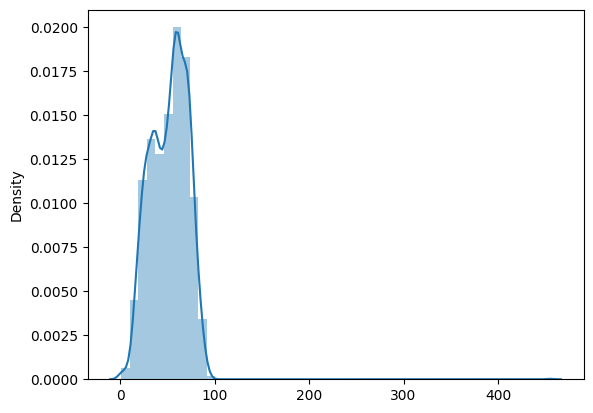

In [63]:
sns.distplot([age])

<Axes: ylabel='Count'>

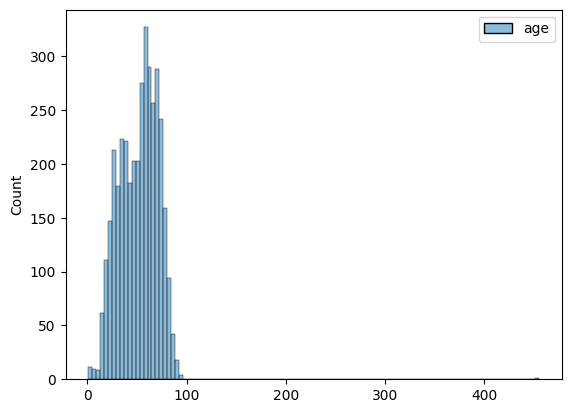

In [64]:
sns.histplot([age])

<Axes: xlabel='age'>

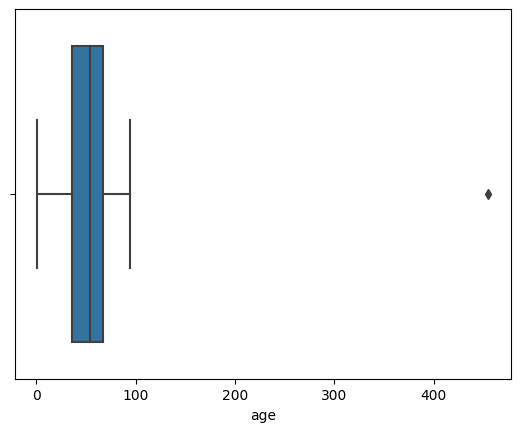

In [65]:
sns.boxplot(x=dt['age'])

In [66]:
dt['age'].describe()

count    3772.000000
mean       51.745758
std        20.091459
min         1.000000
25%        36.000000
50%        54.000000
75%        67.000000
max       455.000000
Name: age, dtype: float64

In [67]:
dt['age'].quantile(0)

1.0

In [68]:
q1=dt['age'].quantile(0.25)
q1

36.0

In [69]:
q3=dt['age'].quantile(0.75)
q3

67.0

In [70]:
IQR=q3-q1
IQR

31.0

In [71]:
lower_range=q1-1.5*IQR
lower_range

-10.5

In [72]:
upper_range = q3+1.5*IQR
upper_range

113.5

# Trimming

In [73]:
trimming_data=dt[(dt['age']>lower_range) & (dt['age']<upper_range) ]
trimming_data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,?,SVI,P


<Axes: xlabel='age', ylabel='Density'>

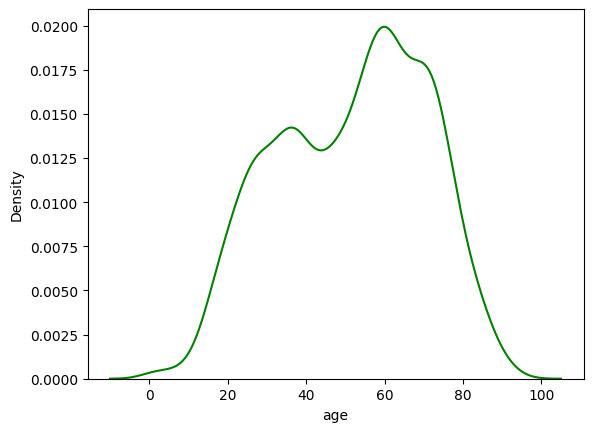

In [74]:
sns.kdeplot(trimming_data['age'],color='g')

<Axes: xlabel='age'>

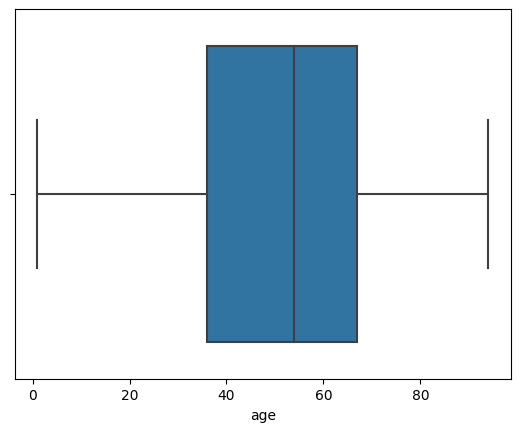

In [75]:
sns.boxplot(x=trimming_data['age'])

<Axes: xlabel='age', ylabel='age'>

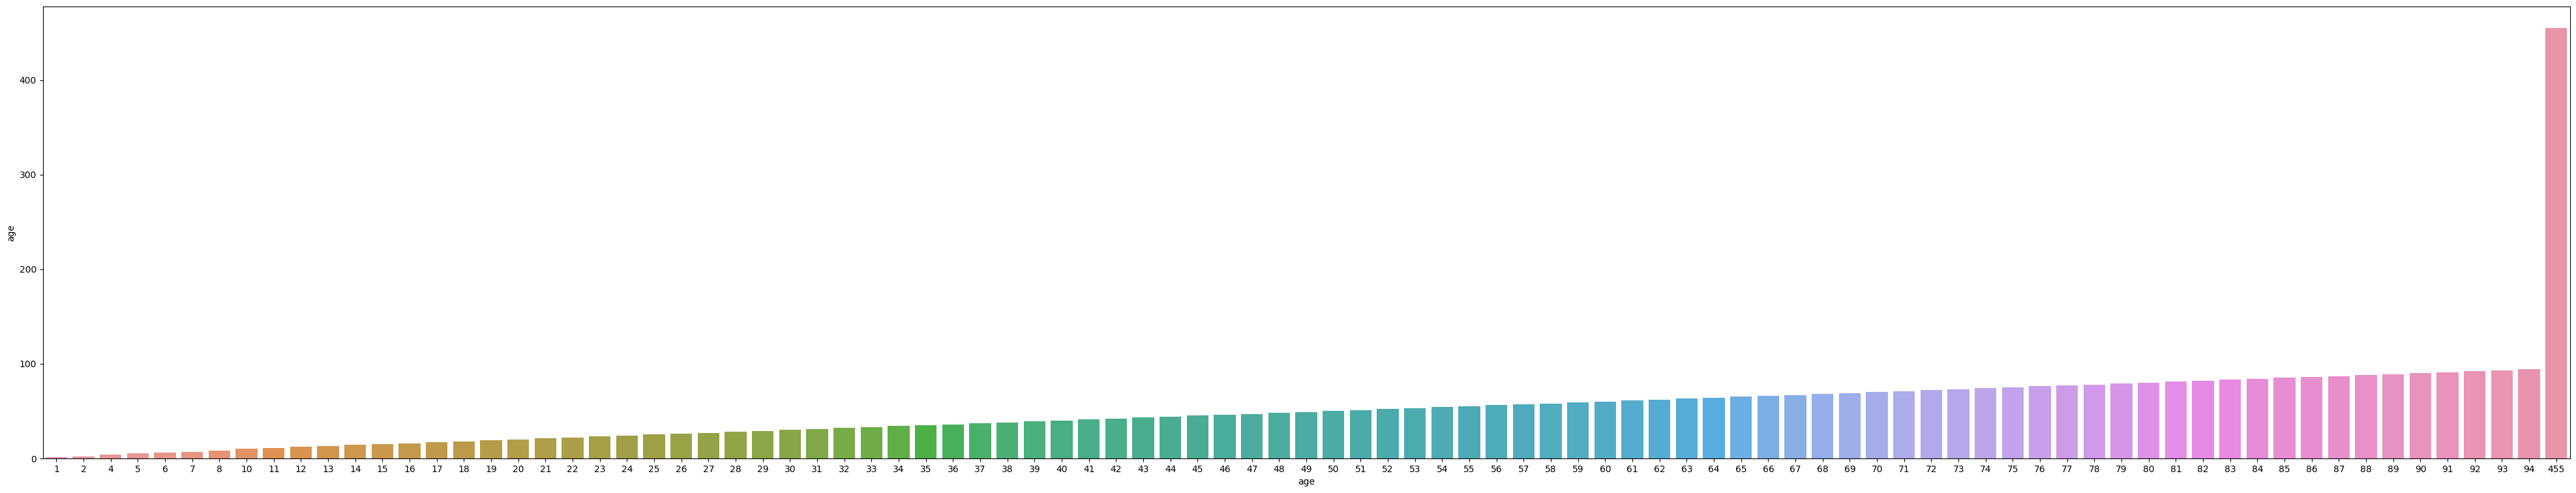

In [77]:
plt.figure(figsize=(50,9))

sns.barplot(dt,x='age',y='age')

# Capping

In [78]:
lower_range

-10.5

In [80]:
capping_range=dt.copy()

In [81]:
capping_range['age']=np.where(capping_range['age'] < lower_range,lower_range,
          np.where(capping_range['age'] > upper_range,upper_range,
                   capping_range['age'])
                  )

In [82]:
capping_range['age'].min()

1.0

In [83]:
capping_range['age'].max()

113.5

In [84]:
capping_range['age'].mean()

51.655222693531286

In [85]:
capping_range['age']

0       41.0
1       23.0
2       46.0
3       70.0
4       70.0
        ... 
3767    30.0
3768    68.0
3769    74.0
3770    72.0
3771    64.0
Name: age, Length: 3772, dtype: float64

<Axes: xlabel='age', ylabel='Density'>

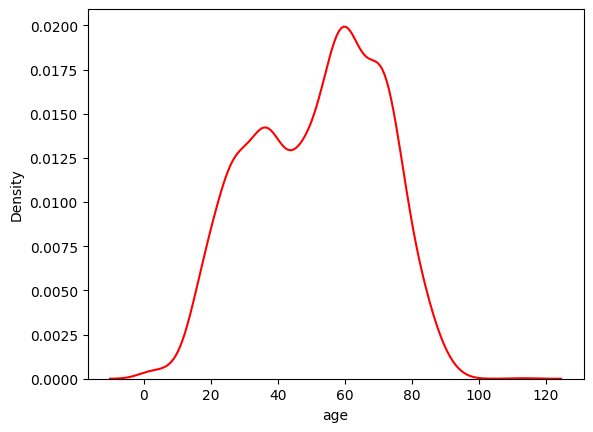

In [86]:
sns.kdeplot(capping_range['age'],color='r')

<Axes: xlabel='age'>

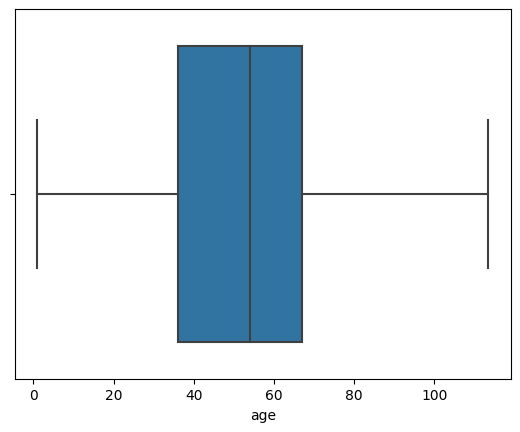

In [87]:
sns.boxplot(x=capping_range['age'])

## With median

In [89]:
capping_median=dt.copy()
capping_median

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,f,f,f,t,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1,t,2.1,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,t,5.1,t,1.8,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2,t,82,t,0.94,t,87,f,?,SVI,P


In [90]:
median=capping_median['age'].median()
median

54.0

In [91]:
dt.describe()

,age
count,3772.000000
mean,51.745758
std,20.091459
min,1.000000
25%,36.000000
50%,54.000000
75%,67.000000
max,455.000000


In [92]:
capping_median['age']=np.where(capping_median['age'] < lower_range,median,
          np.where(capping_median['age'] > upper_range,median,
                   capping_median['age'])
                  )

<Axes: xlabel='age', ylabel='Density'>

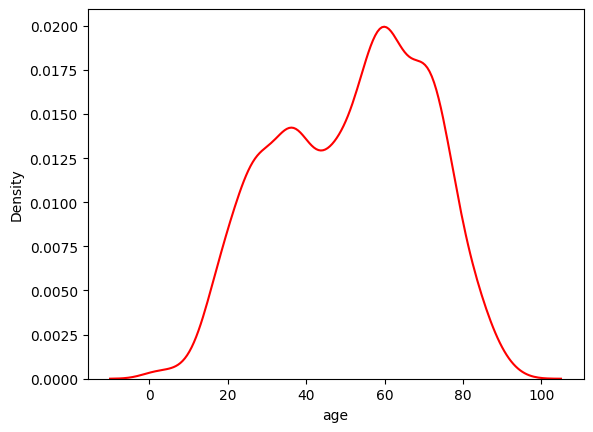

In [93]:
sns.kdeplot(capping_median['age'],color='r')

<Axes: xlabel='age', ylabel='Count'>

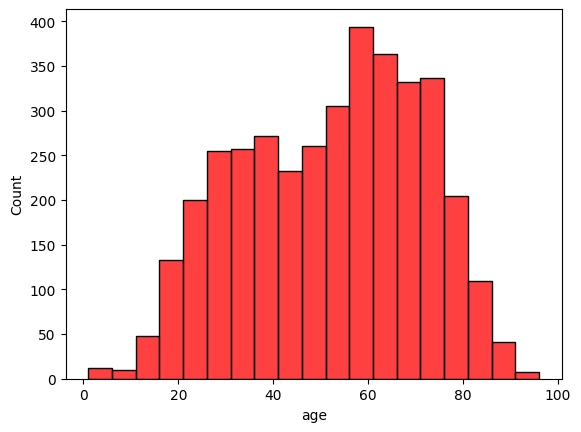

In [94]:
sns.histplot(capping_median['age'],color='r',binwidth=5)

In [95]:
std_dt=dt.copy()
lower_limit = std_dt["age"].mean() - (3 * std_dt["age"].std())
upper_limit = std_dt["age"].mean() + (3 * std_dt["age"].std())

print(lower_limit)
print(upper_limit)

-8.52861805108234
112.02013448798584
